In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sln
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# reading csv dataset in dataframe df

df = pd.read_csv("BeerDataScienceProject.csv", encoding='latin-1')
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [3]:
# checking shape of dataframe 
df.shape

(528870, 13)

In [4]:
# Null values in dataset
df.isnull().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

In [5]:
# filling missing value of beer_ABV with mean value
df.beer_ABV.fillna(df.beer_ABV.mean(), inplace=True)

**Question 1. Rank top 3 Breweries which produce the strongest beers?**

**Answer - Sorting beer_ABV and droping duplicates brewer ID to find top 3 unique breweries**

In [6]:
df.sort_values(by=['beer_ABV'], ascending=False).drop_duplicates(['beer_brewerId']).groupby('beer_brewerId').head().head(3)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
12889,57.7,73368,6513,Schorschbräu Schorschbock 57%,Eisbock,4.0,4.0,4.0,4.0,kappldav123,3.5,"New world strongest beer. Very limited, only 3...",1316780901
293847,27.0,25759,35,Samuel Adams Utopias,American Strong Ale,5.0,5.0,5.0,5.0,Pencible,5.0,This was quite an exceptional treat to sample....,1206826305
62157,19.5,61328,16866,Cherry Chocolate Rain,American Double / Imperial Stout,4.5,5.0,4.5,4.0,HopHead84,4.5,10/26/10 I stumbled toward the entrance of The...,1288206214


<AxesSubplot:xlabel='beer_brewerId', ylabel='beer_ABV'>

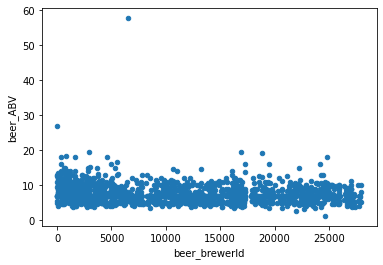

In [7]:
# Scatter Plot to show breweies producing strong beers.
df_strong_beer = df.sort_values(by=['beer_ABV'], ascending=False).drop_duplicates(['beer_brewerId']).groupby('beer_brewerId').head()
df_strong_beer.plot.scatter(y='beer_ABV', x='beer_brewerId')

**Question 4. If you were to recommend 3 beers to your friends based on this data which ones will you recommend?**

**Answer - Beer having highest review_overall rating**

In [8]:
df.sort_values(by=['review_overall'], ascending=False).head(3)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
338785,9.2,1696,207,Trappistes Rochefort 8,Dubbel,4.0,4.5,5.0,4.0,zeff80,4.5,A - Pours out a reddish/brown color with a thr...,1166570949
123522,9.0,19488,273,Sweetwater Happy Ending Imperial Stout,American Double / Imperial Stout,4.0,4.5,5.0,4.0,kimcgolf,3.5,"This was a really good beer, but not a really ...",1173614122
411322,7.5,15881,694,Tröegs Nugget Nectar,American Amber / Red Ale,4.5,4.5,5.0,5.0,Chico1985,5.0,"Bomber poured into a pint glass, bottle date i...",1263618175


**Question 3. Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?**

**Answer - [Aroma] by using correlation we can find the most important factor.**

In [9]:
df[['review_appearance', 'review_palette', 'review_overall', 'review_taste', 'review_aroma']].corr()['review_overall']

review_appearance    0.486687
review_palette       0.601971
review_overall       1.000000
review_taste         0.692454
review_aroma         0.783002
Name: review_overall, dtype: float64

<AxesSubplot:>

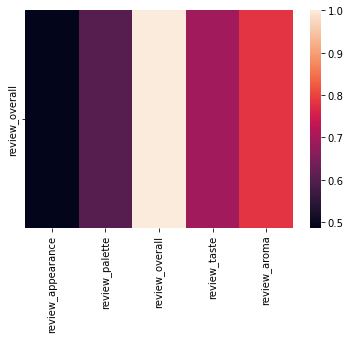

In [10]:
# heatmap to show correlation of other factors with review_overall
sln.heatmap(df[['review_appearance', 'review_palette', 'review_overall', 'review_taste', 'review_aroma']].corr().loc[['review_overall'],:])

In [11]:
# dropping Nan values row for "review_text"
df = df.dropna(subset=['review_text'])

In [12]:
df.isnull().sum()

beer_ABV                0
beer_beerId             0
beer_brewerId           0
beer_name               0
beer_style              0
review_appearance       0
review_palette          0
review_overall          0
review_taste            0
review_profileName    115
review_aroma            0
review_text             0
review_time             0
dtype: int64

In [13]:
# preparing data for making word cloud
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6, max_features=4000)

In [14]:
cv_data = count_vectorizer.fit_transform(df['review_text'].str.lower())
tfidf_data = tfidf_vectorizer.fit_transform(df['review_text'].str.lower())

In [15]:
!pip install wordcloud

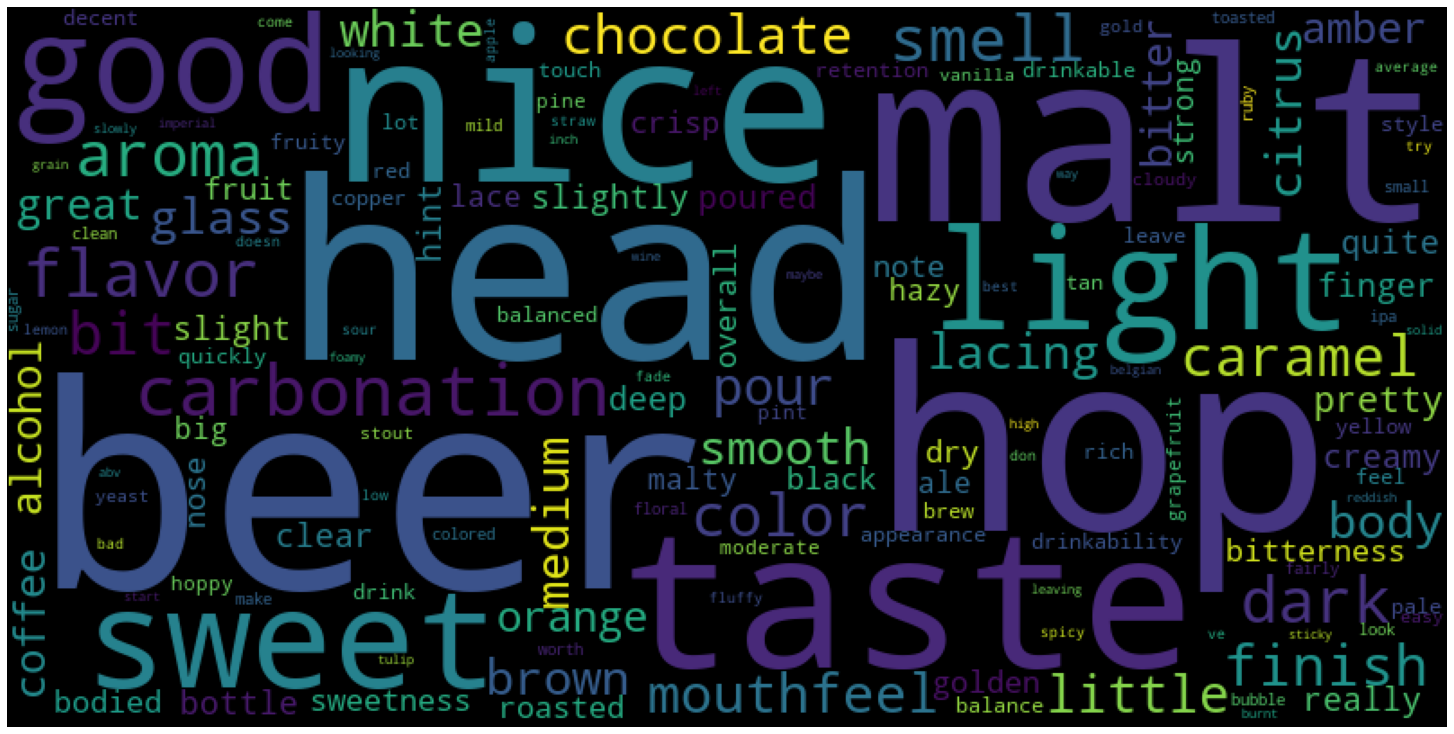

In [16]:
from wordcloud import WordCloud

for_wordcloud = count_vectorizer.get_feature_names_out()
for_wordcloud = for_wordcloud
for_wordcloud_str = ' '.join(for_wordcloud)

wordcloud = WordCloud(width=800, height=400, background_color ='black',
                      min_font_size = 7).generate(for_wordcloud_str)

plt.figure(figsize=(20, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()